In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

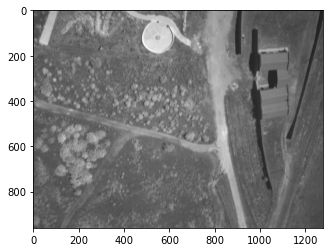

In [56]:
# IMAGE ALIGNMENT #

# Read the images to be aligned
color_image = cv2.imread("IMG_0070_3.tif", cv2.IMREAD_COLOR)
nir_image = cv2.imread("IMG_0070_4.tif", cv2.IMREAD_COLOR)
plt.imshow(color_image)
plt.imshow(nir_image)

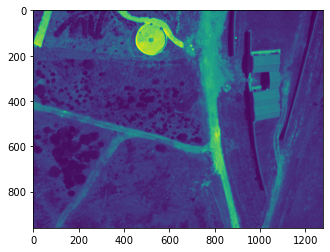

In [57]:
# Convert images to gray scale
red_channel = color_image[:, :, 0]
nir_channel = nir_image[:, :, 0]
plt.imshow(red_channel)

In [58]:
# Define the motion model
warp_mode = cv2.MOTION_TRANSLATION

In [59]:
# Define 2x3 or 3x3 matrices and initialize the matrix to identity
if warp_mode == cv2.MOTION_HOMOGRAPHY :
     warp_matrix = np.eye(3, 3, dtype=np.float32)
else:
     warp_matrix = np.eye(2, 3, dtype=np.float32)

In [60]:
# Specify the number of iterations.
number_of_iterations = 5000

In [61]:
# Specify the threshold of the increment
# in the correlation coefficient between two iterations
termination_eps = 1e-10

In [62]:
# Define termination criteria
criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

[[63 65 67 ... 40 41 38]
 [61 60 66 ... 42 40 42]
 [62 59 59 ... 43 41 39]
 ...
 [45 42 37 ... 44 48 49]
 [44 43 41 ... 46 48 49]
 [42 43 43 ... 46 47 50]]


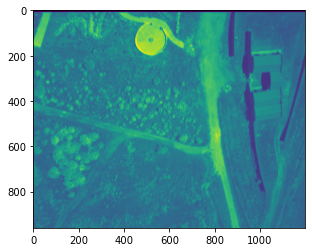

In [63]:
# Run the ECC algorithm. The results are stored in warp_matrix.

(cc, warp_matrix) = cv2.findTransformECC(red_channel, nir_channel, warp_matrix, warp_mode, criteria)

if warp_mode == cv2.MOTION_HOMOGRAPHY:

# Use warpPerspective for Homography
    nir_aligned = cv2.warpPerspective(nir_channel, warp_matrix, (1200, 960), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)
else:

# Use warpAffine for Translation, Euclidean and Affine
    nir_aligned = cv2.warpAffine(nir_channel, warp_matrix, (1200, 960), flags=cv2.INTER_LINEAR + cv2.WARP_INVERSE_MAP)

#cv2.imwrite('output/niraligned.tif', nir_aligned)
plt.imshow(nir_aligned)

[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 ...
 [ 0.3129771   0.32258064  0.36206895 ...  0.20930232  0.21481481
   0.2       ]
 [ 0.33333334  0.32283464  0.31092438 ...  0.18796992  0.23529412
   0.21481481]
 [ 0.34375     0.312       0.2892562  ...  0.17910448  0.23529412
   0.21167883]]


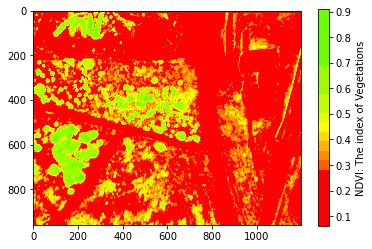

In [66]:
# NDVI #

ligne, colonne = nir_aligned.shape
ndvi = np.empty((ligne, colonne), dtype=np.float32)
for i in range(ligne):
    for j in range(colonne):
         if (float(nir_aligned[i,j]) + float(red_channel[i, j]) == 0):
             ndvi[i, j] = 0
         else:
            ndvi[i, j] = float(float(nir_aligned[i, j])-float(red_channel[i, j]))/float(float(nir_aligned[i, j]) + float(red_channel[i, j]))
print(ndvi)

# Create the colormap & show the result
fig = plt.figure()

plt.imshow(ndvi, cmap=ListedColormap(['#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000', '#ff0000',
    '#ff5e00',
    '#ff8d00',
    '#ffb300',
    '#ffdb00',
    '#ffff00',
    '#e1ff00',
    '#c1ff00', '#c1ff00',
    '#9bff00', '#9bff00', '#9bff00',
    '#6cff00', '#6cff00', '#6cff00', '#6cff00', '#6cff00', '#6cff00']),
    vmin=0.06, vmax=0.91)
cbar = plt.colorbar(orientation='vertical')
cbar.set_label('NDVI: The index of Vegetations')
fig.savefig('NDVI.tif')